# Semantic Segmentation v2
Implement FCN-32s architecture for semantic segmentation.

[Paper](https://www.cv-foundation.org/openaccess/content_cvpr_2015/papers/Long_Fully_Convolutional_Networks_2015_CVPR_paper.pdf)

## Download and load data:

In [ ]:
!wget https://www.mimuw.edu.pl/~bilinski/VRNN2020/labs/datasets/segmentation.npz

--2021-01-13 09:13:09--  https://www.mimuw.edu.pl/~bilinski/VRNN2020/labs/datasets/segmentation.npz
Resolving www.mimuw.edu.pl (www.mimuw.edu.pl)... 193.0.96.14
Connecting to www.mimuw.edu.pl (www.mimuw.edu.pl)|193.0.96.14|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 307552213 (293M)
Saving to: ‘segmentation.npz’

segmentation.npz    100%[===================>] 293.30M  3.55MB/s    in 72s     

2021-01-13 09:14:22 (4.07 MB/s) - ‘segmentation.npz’ saved [307552213/307552213]



In [ ]:
# Data is already preprocessed for VGG16, just load it.
import numpy as np
data = np.load('segmentation.npz')
train_x, train_y, test_x, test_y = data['train_x'], data['train_y'], data['test_x'], data['test_y']
del data

## Architecture to implement:

Visualization: FCN32s.png

- VGG16

- Conv2D, 7x7, 4096, relu, same

- Dropout 0.5

- Conv2D, 1x1, 4096, relu, same

- Dropout 0.5

- Conv2D nb_classes 1x1

- x = Conv2DTranspose(filters=nb_classes, kernel_size=(64, 64), strides=(33, 32), padding='same', activation='sigmoid')(x)

- Cropping2D

In [ ]:
import numpy as np
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Dropout, Conv2DTranspose, Cropping2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import MeanIoU
nb_classes = 12

inputs = Input(shape=(360, 480, 3))
x = VGG16(weights='imagenet', include_top=False, input_tensor=inputs)
conv1 = Conv2D(4096, (7, 7), activation='relu', padding='same')(x.output)
drop1 = Dropout(0.5)(conv1)
conv2 = Conv2D(4096, (1, 1), activation='relu', padding='same')(drop1)
drop2 = Dropout(0.5)(conv2)
conv3 = Conv2D(nb_classes, (1, 1))(drop2)
x = Conv2DTranspose(filters=nb_classes, kernel_size=(64, 64), strides=(33, 32), padding='same', activation='sigmoid')(conv3)
output = Cropping2D(cropping=((2, 1), (0, 0)))(x)
model = Model(inputs=inputs, outputs=output)
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['acc'])

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 360, 480, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 360, 480, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 360, 480, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 180, 240, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 180, 240, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 180, 240, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 90, 120, 128)      0   

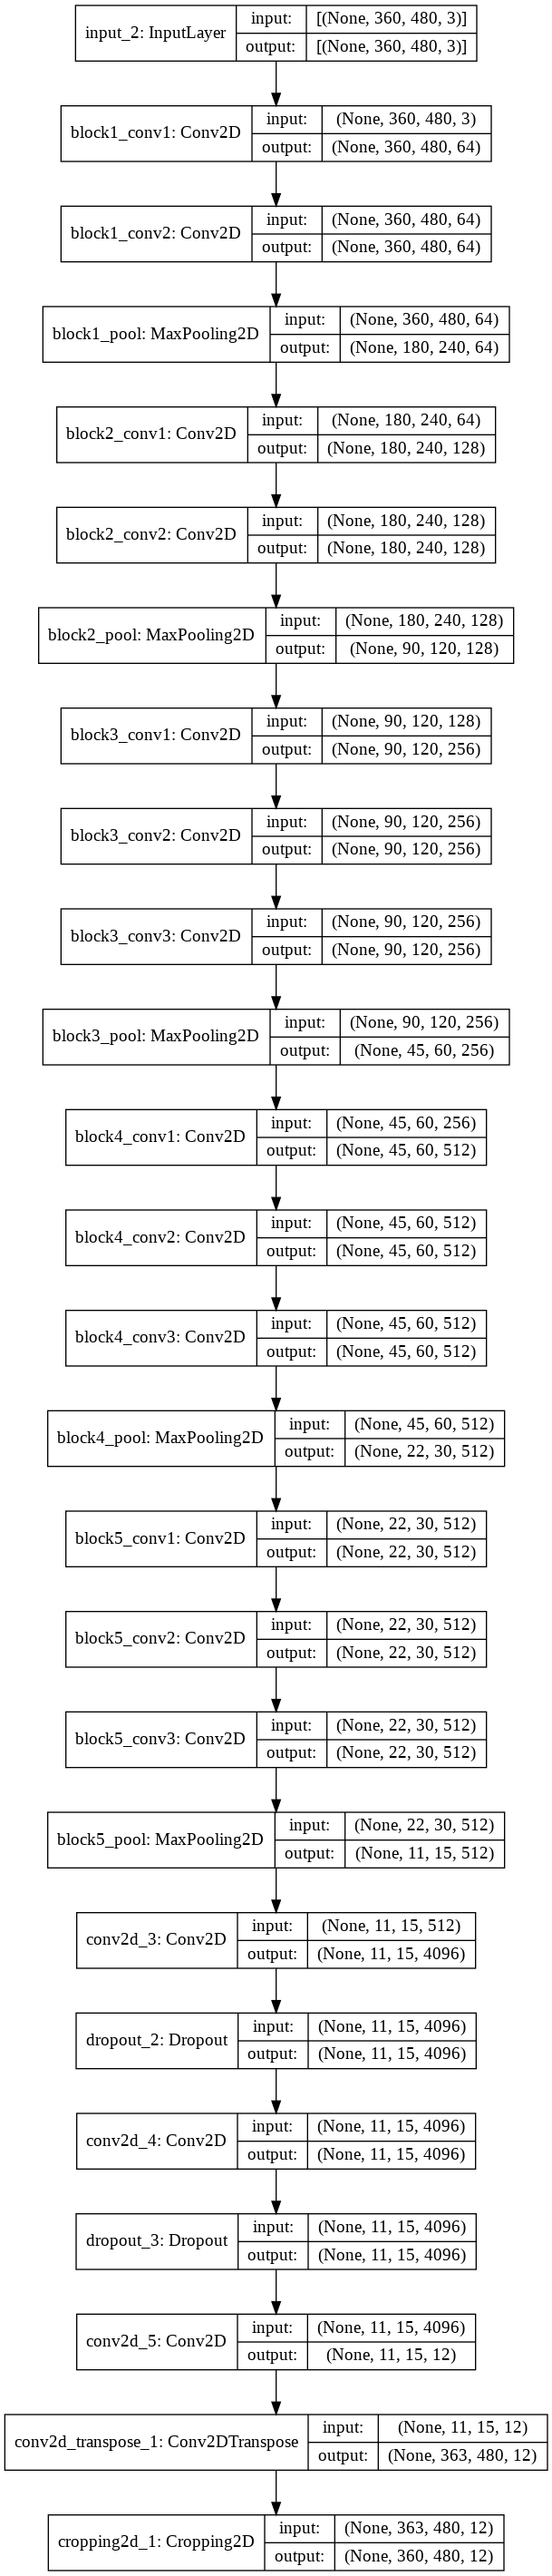

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True)

In [ ]:
model.fit(train_x, train_y, epochs=30, batch_size=3, validation_data=(test_x, test_y))

Epoch 1/30
123/123 [==============================] - 36s 283ms/step - loss: 1.7578 - acc: 0.3323 - val_loss: 0.8908 - val_acc: 0.5404
Epoch 2/30
123/123 [==============================] - 34s 275ms/step - loss: 0.7724 - acc: 0.6053 - val_loss: 0.6332 - val_acc: 0.7767
Epoch 3/30
123/123 [==============================] - 34s 275ms/step - loss: 0.5521 - acc: 0.8118 - val_loss: 0.4538 - val_acc: 0.8557
Epoch 4/30
123/123 [==============================] - 34s 275ms/step - loss: 0.4634 - acc: 0.8519 - val_loss: 0.4034 - val_acc: 0.8664
Epoch 5/30
123/123 [==============================] - 34s 275ms/step - loss: 0.3784 - acc: 0.8789 - val_loss: 0.4095 - val_acc: 0.8663
Epoch 6/30
123/123 [==============================] - 34s 276ms/step - loss: 0.3509 - acc: 0.8852 - val_loss: 0.3916 - val_acc: 0.8707
Epoch 7/30
123/123 [==============================] - 34s 276ms/step - loss: 0.3038 - acc: 0.8987 - val_loss: 0.3727 - val_acc: 0.8841
Epoch 8/30
123/123 [==============================] - 3

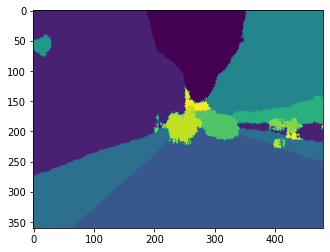

In [31]:
import matplotlib.pyplot as plt
pred = model.predict(np.expand_dims(test_x[0], axis=0))[0].argmax(axis=2)
plt.imshow(pred)

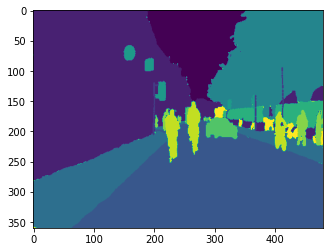

In [ ]:
plt.imshow(test_y[0].argmax(axis=2))

## Save the trained model

In [ ]:
model.save('./Hubert_Budzynski_hb406109.h5')

## Load the trained model and evaluate it on the test set

In [ ]:
from tensorflow.keras.models import load_model
loaded_model = load_model('./Hubert_Budzynski_hb406109.h5')

In [ ]:
loaded_model.evaluate(test_x, test_y)

4/4 [==============================] - 5s 556ms/step - loss: 0.3587 - acc: 0.8981


[0.358659952878952, 0.8981190323829651]

## Submission
You need to send by the deadline:
- the trained model with architecture and weights (as YourFirstName_YourSourname_Indeks.h5 file)
- and jupyter notebook (ipynb file) with all outputs and training logs (as YourFirstName_YourSourname_Indeks.ipynb file). The trained model should be reproducible by running Runtime -> Run all.

You should be able to train the model with batch_size=3. In case of problems, feel free to change Conv2D 4096->2048. Such an architecture should obtain at least 89.5% pixel accuracy on the test set.

Please remember that typically we use different metrics for semantic segmentation.